In [1]:
# MACHINE LEARNING

In [2]:
# NAIVE BAYES p1

# Obs: algoritmo de aprendizado de máquina probabilístico que é usado para classificação de dados
# assume que as características de um objeto são independentes umas das outras. Isso significa que a probabilidade de um objeto
# pertencer a uma determinada classe não é afetada pelos valores das outras características. 
# Essa suposição é considerada ingênua porque nem sempre é verdadeira.
# No nosso caso, aplicamos o teorema a partir da função GaussianNB

In [1]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

# Obs: "  LabelEncoder " -> usada para converter dados categóricos em dados numéricos
# Por exemplo, se você tiver um conjunto de dados que contém a coluna Genero com os valores Feminino e Masculino, você pode usar ...
# ...a classe LabelEncoder para converter esses valores em números, como 0 e 1

In [2]:
# Carregamento da base de dados e defiição das previsões
# (variáveis independentes - X) e a classe (variável dependente - y)

credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [15]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
# Formato de matriz
# Gerar objetos independentes e dependente


previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

# Obs: " previsores ", objeto para variáveis independentes e " classe " para dependente, ou seja, o que se quer descobrir

In [5]:
previsores[0]

array(['<0', 6, "'critical/other existing credit'", 'radio/tv', 1169,
       "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
       "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes', 'yes'],
      dtype=object)

In [20]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência, vamos executar o processo de ...
# ... encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente...
# O que deixará o teste inconsistente


labelencoder1 = LabelEncoder()
previsores[:, 0] = labelencoder1.fit_transform(previsores[:, 0])

labelencoder2 = LabelEncoder()
previsores[:, 2] = labelencoder2.fit_transform(previsores[:, 2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])



In [22]:
# Divisão da base de dados entre treino e teste (30% para teste, e 70% para treino)


X_train, X_test, y_train, y_test = train_test_split(previsores,
                                                   classe,
                                                   test_size = 0.3,
                                                   random_state = 0)

X_test


# Obs: "  random_state " é usado para controlar a aleatoriedade do processo de divisão de dados. 
# Isso pode ser útil para garantir que os conjuntos de treinamento e teste sejam representativos dos dados de origem
# o valor de " random_state " é um inteiro que é usado como semente para o gerador de números aleatórios. 
# Se você definir o mesmo valor para o parâmetro random_state, o processo de divisão de dados será o mesmo sempre que você executar o código.

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [ ]:
# Criação e treinamento do modelo (geração de tabela de probabilidades)


naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

In [ ]:
# Previsões utilizando os registros de teste


previsoes = naive_bayes.predict(X_test)
previsoes

In [25]:
# Geração da matriz de confusão


confusao = confusion_matrix(y_test, previsoes)
confusao

# Obs: "  Matriz de Confusão " -> 

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [27]:
# Descobrir taxa de acerto do modelo


taxa_acerto = accuracy_score(y_test, previsoes)


# Obs: taxa de erro seria equivalente a: (taxa_erro = 1 - taxa_acerto)

0.71

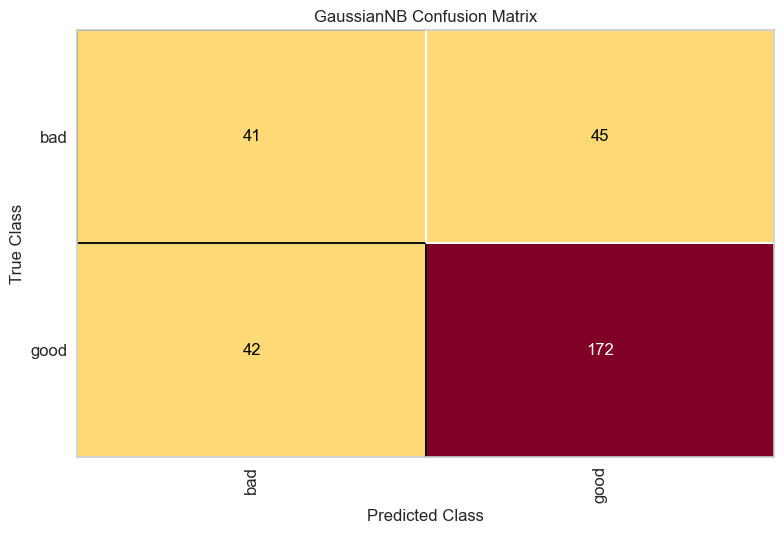

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
# Visualização da matriz de confusão de forma gráfica
# Obs: Warning interno da bibl. yellowbrick, já está na última versão (sem solução p/ o warning no momento)


v = ConfusionMatrix(GaussianNB())
v.fit(X_train, y_train)
v.score(X_test, y_test)
v.poof()

In [1]:
# Previsão com novo registro, transformando os atributos categóricos em numéricos

import pandas as pd
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito.shape


(1, 20)

In [2]:
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [35]:
# Usamos o mesmo objeto que foi criado antes para manter o padrão de dados
# Chamamos somente o método "transform", pois a adaptação aos dados já foi feita anteriormente


novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:, 0] = labelencoder1.transform(novo_credito[:, 0])
novo_credito[:, 2] = labelencoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelencoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelencoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelencoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelencoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelencoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelencoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelencoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelencoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelencoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelencoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelencoder13.transform(novo_credito[:, 19])


In [37]:
# Aplicando o modelo, e testando uma única linha para saber se o cliente é bom ou não


naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

In [1]:
# ÁRVORES DE DECISÃO p2

In [ ]:
# Árvores de decisão são um tipo de algoritmo de aprendizado de máquina supervisionado que pode ser usado para classificação ou regressão. 
# Em uma árvore de decisão, os dados são divididos em subconjuntos com base em um determinado critério, até que cada subconjunto seja homogêneo. 
# O critério de divisão geralmente é a redução da entropia ou do erro quadrático médio

# A classe DecisionTreeClassifier tem os seguintes argumentos principais:

# criterion: O critério de divisão a ser usado. Os valores possíveis são entropy e gini.
# max_depth: A profundidade máxima da árvore.
# min_samples_split: O número mínimo de amostras necessárias para dividir um nó.
# min_samples_leaf: O número mínimo de amostras necessárias para um nó folha.

# A classe DecisionTreeClassifier também tem os seguintes métodos principais:

# fit(): Treina a árvore de decisão nos dados de treinamento.
# predict(): Faz previsões para novos dados.
# predict_proba(): Retorna as probabilidades de cada classe para novos dados.

In [2]:
# Importações

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
# import graphviz
from sklearn.tree import export_graphviz

# conda install -c conda-forge python-graphviz (para evitar warnings)

In [3]:
# Carregamento da base de dados e definição dos previsores (variáveis independentes - )
# ... e classe(variável dependente - y)

credito = pd.read_csv('Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
# definição dos previsores (variáveis independentes - x) e classe (variável dependente - y)


previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [5]:
# Conversão dos atributos categóricos para atributos numéricos 


labelencoder = LabelEncoder()

previsores[:, 0] = labelencoder.fit_transform(previsores[:, 0])
previsores[:, 2] = labelencoder.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [6]:
# Divisão da base de dados entre treinamento e teste
# 30 % dos dados para teste e 70% dos dados para treino


X_train, X_test, y_train, y_test = train_test_split(previsores, classe, 
                                                   test_size=0.3, random_state=0)

In [ ]:
# Criação e treinamento do modelo


arvore = DecisionTreeClassifier()
arvore.fit(X_train, y_train)

In [18]:
# Exportação da árvore de decisão para o formato .dot, para posterior visualização


export_graphviz(arvore, out_file = 'tree.dot')

In [ ]:
# Obtenção das previsões


previsoes = arvore.predict(X_test)
previsoes

In [11]:
# Matriz de confusão


confusao = confusion_matrix(y_test, previsoes)
confusao
# confusao = confusion_matrix(y_train, previsoes)

array([[ 44,  42],
       [ 50, 164]], dtype=int64)

In [12]:
# Taxa de acerto


taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.6933333333333334

In [1]:
# Obs: link para visualizar arquivo de árvore gerado:
# tree.dot

# webgraphviz.com

In [2]:
# SELEÇÃO DE ATRIBUTOS, p3

In [1]:
# Importação das bibliotecas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier


# Obs: "  SVC " -> A biblioteca from sklearn.svm import SVC é usada para importar o classificador de máquina de vetores de suporte ...
# ...(SVM) da biblioteca scikit-learn. O SVM é um algoritmo de aprendizado supervisionado que pode ser usado para classificação e ...
# regressão

# Obs: "  ExtraTreesClassifier " ->  algoritmo de aprendizado de máquina ensemble que usa uma floresta aleatória de árvores de decisão.
# As árvores de decisão são um tipo de algoritmo de aprendizado supervisionado que pode ser usado para classificação e regressão. 
# Uma floresta aleatória é um conjunto de árvores de decisão que são treinadas de forma independente umas das outras.

# **objetivo da aula** -> demonstrar que é possível através da seleção dos dados mais relevantes (ExtraTreesClassifier().feature_importances_),
# criar um modelo com o algoritmo SVM - (SVC()), com menos dados e melhores resultados

In [2]:
# Carregamento da base de dados


credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [3]:
# Criação das variáveis independentes (previsores) e dependentes (classe)


previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:,20].values

In [4]:
# Transformação dos atributos categóricos am atributos numéricos



labelencoder = LabelEncoder()

previsores[:, 0] = labelencoder.fit_transform(previsores[:, 0])

previsores[:, 2] = labelencoder.fit_transform(previsores[:, 2])

previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])

previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])

previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])

previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])

previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])

previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])

previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])

previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])

previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])

previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])

previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [5]:
# Divisão da base de dados entre treinamento e teste (30% para teste e 70% para treino)


X_train, X_test, y_train, y_test = train_test_split(previsores, classe,
                                                   test_size=0.3, random_state=1)

In [ ]:
# Criação do modelo e treinamento


svm = SVC()
svm.fit(X_train, y_train)

# **SVC()** -> A função SVC() é uma função do módulo sklearn.svm, que implementa o algoritmo de aprendizado de máquina chamado 
# Support Vector Machine (SVM). SVM é um método de classificação supervisionado que pode ser usado para problemas de classificação 
# binária ou multiclasse. A ideia básica do SVM é encontrar um hiperplano que separe os dados em duas ou mais classes, 
# de forma que a distância entre o hiperplano e os pontos mais próximos de cada classe (chamados de vetores de suporte) seja máxima. 
# Essa distância é chamada de margem e indica o quão bem o hiperplano separa os dados.

# A função SVC() recebe como parâmetros os dados de entrada (X) e os rótulos das classes (y), além de outros argumentos opcionais 

In [9]:
# Previsões para o modelo


previsoes_svm = svm.predict(X_test)
previsoes_svm[0:5]

array(['good', 'bad', 'good', 'good', 'good'], dtype=object)

In [11]:
# Acuracia

resultados_svm = accuracy_score(y_test, previsoes_svm)
resultados_svm

0.7166666666666667

In [ ]:
# Cria-se modelo com Extra Trees Classifier
# Ajusta-se o modelo aos dados


forest = ExtraTreesClassifier()
forest.fit(X_train, y_train)


# **ExtraTreesClassifier()** -> A função ExtraTreesClassifier() é uma função do módulo sklearn.ensemble, que implementa o algoritmo de
# aprendizado de máquina chamado Extremely Randomized Trees (Extra Trees). 
# Extra Trees é um método de classificação supervisionado que pode ser usado para problemas de classificação binária ou multiclasse.
# A ideia básica do Extra Trees é construir um conjunto de árvores de decisão aleatórias e combinar suas previsões usando a regra da 
# maioria. As árvores de decisão são estruturas que permitem dividir os dados em subconjuntos homogêneos, 
# baseados em critérios de divisão escolhidos a partir das características dos dados. 
# As árvores de decisão são capazes de capturar relações não-lineares e interações entre as características.

# A função ExtraTreesClassifier() recebe como parâmetros os dados de entrada (X) e os rótulos das classes (y), 
# além de outros argumentos opcionais que especificam o número de árvores a serem construídas (n_estimators), 
# o critério de divisão (criterion), 
# a profundidade máxima das árvores (max_depth), etc. 
# A função retorna um objeto que representa o modelo treinado, que pode ser usado para fazer previsões em novos dados usando o 
# método predict().



In [13]:
# Extração das características mais importantes


importancias = forest.feature_importances_
importancias

# Cria-se objeto aplicando-se o atributo feature_importances_ da Classe ExtraTreeClassifier ao modelo
# **feature_importances** -> O atributo feature_importances_ se refere à importância relativa de cada característica (feature) 
# para a classificação dos dados pelo modelo ExtraTreesClassifier(). 
# Esse atributo é um vetor que contém valores entre 0 e 1, que somam 1, e que indicam o quanto cada característica contribui 
# para a decisão do modelo. 
# Quanto maior o valor, mais importante é a característica. 
# Esse atributo pode ser usado para selecionar as características mais relevantes para o problema ou para avaliar o impacto 
# de cada característica na performance do modelo

array([0.10242247, 0.08155529, 0.06784971, 0.05792318, 0.08045904,
       0.05138059, 0.04905182, 0.05290478, 0.04243258, 0.02845898,
       0.05021103, 0.04792854, 0.07232005, 0.0426019 , 0.03789389,
       0.0351889 , 0.0399188 , 0.02028434, 0.03270449, 0.00650961])

In [14]:
# Criação da nova base de dados utilizando os atributos mais importantes


X_train_2 = X_train[:, [0, 1, 2, 3]]
X_test_2 = X_test[:, [0, 1, 2, 3]]

X_test_2[0:3, :]

array([[1, 15, 0, 1],
       [2, 36, 3, 6],
       [0, 12, 4, 5]], dtype=object)

In [ ]:
# Criar outro modelo com a base de dados reduzida
# Treinamento e obtenção das previsões e taxa de acerto


svm_2 = SVC()
svm_2.fit(X_train_2, y_train)

In [16]:
# Previsões para o novo modelo


previsoes_2 = svm_2.predict(X_test_2)

In [17]:
# Taxa de acerto do modelo com a seleção de atributos


taxa_acerto_nova = accuracy_score(y_test, previsoes_2)
taxa_acerto_nova

0.7233333333333334

In [37]:
# Matrix de confusão com a seleção de atributos

confusao = confusion_matrix(y_test, previsoes_2)
confusao

array([[  9,  77],
       [  6, 208]], dtype=int64)

In [13]:
# APRENDIZADO BASEADO EM INSTÂNCIAS, p4

In [15]:
# Importação das bibliotecas

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import pandas as pd
from scipy import stats

# Obs: " KNeighborsClassifier  " ->  é usada para importar o classificador k-vizinhos mais próximos (KNN) da biblioteca scikit-learn. 
# O KNN é um algoritmo de aprendizado supervisionado que pode ser usado para classificação e regressão.
# classifica uma nova instância com base nos seus k vizinhos mais próximos. 
# Os vizinhos mais próximos são definidos com base na distância entre a nova instância e as instâncias de treinamento

# Obs: "  datasets " ->  usada para importar conjuntos de dados da biblioteca scikit-learn. 
# O conjunto de dados é um conjunto de dados pré-computado que pode ser usado para treinamento e teste de algoritmos de aprendizado de máquina

In [25]:
# Carregamento de disco, apenas para visualização


iristemp = pd.read_csv('iris.csv')
iristemp.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# Carregamento da base de dados e visualização da descrição estatística dos dados


iris = datasets.load_iris()
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [ ]:
# Classe 


iris.target

In [ ]:
# Dados 


iris.data

In [29]:
# Criação dos previsores (variável independente -X) e classe (variável dependente - y)


previsores = iris.data
classe = iris.target

In [30]:
# Divisão da base de dados entre treinamento e teste (70% - treino, 30% - teste)


X_train, X_test, y_train, y_test = train_test_split(previsores, classe, random_state=0, test_size=0.3)

In [ ]:
# Criação do modelo e treinamento


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [33]:
# Obtenção das previsões


previsoes = knn.predict(X_test)

In [35]:
# Obtenção da matriz de confusão


confusao = confusion_matrix(y_test, previsoes)
confusao

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [36]:
# Taxa de acertos


taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.9777777777777777

In [1]:
# ALGORITMO RANDOM FOREST CLASSIFIER, p5

# O algoritmo de machine learning RandomForestClassifier é um método que usa um conjunto de árvores de decisão para 
# realizar tarefas de classificação ou regressão. 
# Cada árvore é treinada com uma amostra aleatória dos dados de entrada e usa um subconjunto aleatório de características
# para fazer a divisão dos nós. 
# A previsão final é obtida pela média ou pela votação das previsões de todas as árvores. 
# Esse método tem a vantagem de reduzir o risco de sobreajuste, aumentar a precisão e a robustez, 
# e lidar com dados faltantes ou atípicos. 
# Para usar esse modelo em Python, você pode usar a biblioteca scikit-learn, que oferece uma classe 
# chamada RandomForestClassifier com vários parâmetros que podem ser ajustados para melhorar o desempenho do modelo


In [1]:
# Importação das bibliotecas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Carregamento da base de dados

credito = pd.read_csv('Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [3]:
# Separação de previsores e classe


previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [5]:
# Transformação dos dados categóricos em numéricos


labelencoder = LabelEncoder()
previsores[:, 0] = labelencoder.fit_transform(previsores[:, 0])
previsores[:, 2] = labelencoder.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [8]:
# Divisão da base de dados em dados de treino e de teste


X_train, X_test, y_train, y_test = train_test_split(previsores, classe,
                                                   test_size = 0.3,
                                                   random_state = 1)

In [ ]:
# Criação do modelo e treinamento


forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

# **n_estimators** -> é o número de árvores que o modelo RandomForestClassifier vai usar para fazer a classificação ou regressão.

In [ ]:
# Apresenta toda a floresta, que são 100 DecisionTreesClassifier(n_estimators=100)


forest.estimators_[1]

In [28]:
# Previsões para o modelo floresta


previsoes = forest.predict(X_test)

In [29]:
# Taxa de acerto do modelo


taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.7633333333333333

In [31]:
# Matriz de confusão para o modelo floresta


confusao = confusion_matrix(y_test, previsoes)
confusao

array([[ 33,  53],
       [ 18, 196]], dtype=int64)

In [1]:
# AGRUPAMENTO COM K-MEANS, p6

In [1]:
# Importação das bibliotecas

from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Obs: " from sklearn.cluster import KMeans " -> é uma biblioteca de aprendizado não supervisionado do Python que implementa ...
# ...o algoritmo K-Means. O K-Means é um algoritmo de clusterização que agrupa um conjunto de dados em k clusters, ...
# onde cada ponto de dados pertence ao cluster com o centroide mais próximo

# Obs: " KMeans " -> é uma classe que implementa o algoritmo K-Means. Ela possui os seguintes atributos e métodos:

#     n_clusters: O número de clusters.
#     init: O método usado para inicializar os centroides.
#     n_init: O número de vezes que o algoritmo é executado com diferentes inicializações.
#     max_iter: O número máximo de iterações do algoritmo.
#     tol: A tolerância para o critério de parada.
#     random_state: O estado aleatório usado para inicializar os centroides e o algoritmo.


In [2]:
# importar banco de dados iris
# Criar variáveis unicos e quantidade 


iris = datasets.load_iris()
unicos, quantidade = np.unique(iris.target, return_counts = True)

In [ ]:
iris.data

In [3]:
# Unicos


unicos

array([0, 1, 2])

In [4]:
# Quantidade


quantidade

array([50, 50, 50], dtype=int64)

In [ ]:
# Agrupamento com k-means, utilizando 3 clustes (de acordo com a base de dados)
# Treinamento do KMenans gerado com os dados 


cluster = KMeans(n_clusters = 3) # Aponta quantos clusters(conjuntos de dados, que por serem três conjuntos, terão também três centroides)
cluster.fit(iris.data)

In [8]:
# Visualização dos três centroides


centroides = cluster.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
# Visualização dos grupos que cada registro foi associado (previsoes)


previsoes = cluster.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [28]:
# Contagem dos registros por classe


unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
unicos2

array([0, 1, 2])

In [30]:
# Quantidade


quantidade2

array([50, 62, 38], dtype=int64)

In [32]:
# Geração da matriz de confusão para comparar os grupos com a base de dados


confusao = confusion_matrix(iris.target, previsoes)
confusao

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

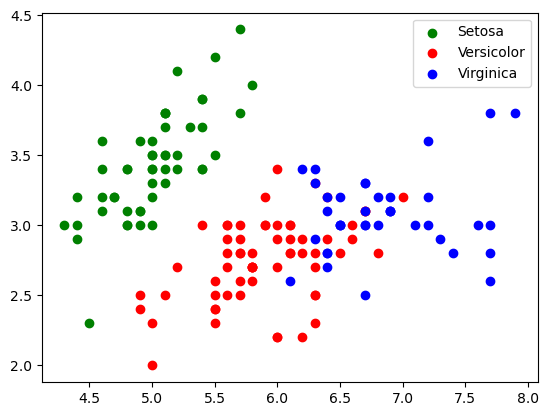

In [33]:
# Geração de gráfico com os clusters gerados, considerando para um (previsores 0, 1, 2)
# Usando somente as colunas 0 e 1 da base de dados original para termos 2 dimensões


plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1],
           c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1],
           c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1], 
           c = 'blue', label = 'Virginica')
plt.legend()

In [ ]:
# # OBS: não entendi a operação iris.data[previsoeres == 0, 1],
# a plotagem sem os dois parâmetros não é funcional, pesquisar

# segundo o bing:
    
#     A operação previsoes == 0, 1 vai retornar um array de valores booleanos (True ou False) 
#     que indicam se cada elemento do array previsoes é igual a 0 ou 1. 
#     Os dois valores 0 e 1 se referem aos rótulos dos clusters que foram atribuídos pelo 
#     algoritmo KMeans aos dados da iris. 
#     Por exemplo, se o array previsoes for [0, 1, 2, 0, 1], então a operação previsoes == 0, 1 
#     vai retornar [True, True, False, True, True]. 
#     Isso significa que os elementos nas posições 0, 1, 3 e 4 do array previsoes são iguais a 0 
#     ou 1, enquanto o elemento na posição 2 é diferente de 0 e 1.

# Obs: A resposta do bing não parece estar correta

# Eu acredito que o 0, e 1, se refere aos eixos x, y, mas não tenho certeza

In [1]:
# AGRUPAMENTO COM SKFUZZY - C-MEANS, p7

In [ ]:
# Instação do skfuzzy

!pip install -U scikit-fuzzy

In [1]:
# Importação de bibliotecas

from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import skfuzzy

In [2]:
# Carregamento da base de dados iris, com datasets


iris = datasets.load_iris()

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# Aplicação do algoritmo definindo três clusters e passando a matriz transposta
# Os outros parâmetros são obrigatórios, e são default indicados na documentação


r = skfuzzy.cmeans(data=iris.data.T, c = 3, m = 2, error = 0.005,
                  maxiter = 1000, init = None)


# Obs: " skfuzzy.means " -> Idêntico ao KMeans, mas em vez de identificar um cluster taxativo, apresenta proporções de probabilidades...
# ... estabelecendo uma maior ou menor probabilidade do objeto pertencer a esse ou àquele cluster em percentagem
# O algoritmo funciona minimizando a soma das distâncias entre os pontos de dados e os centros dos clusters.

# A função cmeans tem os seguintes parâmetros:

#     data: O conjunto de dados a ser clusterizado.
#     c: O número de clusters desejado.
#     m: Um parâmetro que controla a forma das funções de pertinência.
#     error: Um parâmetro que controla a precisão do algoritmo de clustering.
#     maxiter: O número máximo de iterações do algoritmo.
#     init: Uma matriz de inicialização para os centros dos clusters.
#     seed: Uma semente para o gerador de números aleatórios.
    
# A função cmeans retorna um objeto do tipo cmeans que contém os seguintes atributos:

#     u: Uma matriz de pertinência que representa o grau de pertinência de cada ponto de dados em cada cluster.
#     cmeans: Uma matriz de centros dos clusters.
#     cluster_labels: Uma matriz de rótulos de cluster que identificam a qual cluster cada ponto de dados pertence.

#     Aqui está um exemplo de como usar a função cmeans: ?


In [6]:
# Obtendo a porcentagem de um registro pertencer a um cluster, que está na posição 3 da matriz retornada


previsoes_porcentagem = r[1]
previsoes_porcentagem[0]

array([2.30444175e-03, 1.66597497e-02, 1.37661883e-02, 2.24786301e-02,
       3.76207903e-03, 4.48276223e-02, 1.40107366e-02, 3.11717337e-04,
       4.77437663e-02, 1.19431907e-02, 2.17661734e-02, 5.43556850e-03,
       2.01943195e-02, 5.18173792e-02, 7.26329456e-02, 1.04381448e-01,
       3.55921643e-02, 2.28885726e-03, 6.55866543e-02, 1.41629299e-02,
       2.18692236e-02, 1.03778674e-02, 2.75183371e-02, 1.44733759e-02,
       2.32597773e-02, 1.84720845e-02, 3.58491563e-03, 4.56704078e-03,
       4.32966339e-03, 1.42108812e-02, 1.48094783e-02, 1.77063233e-02,
       4.11600775e-02, 6.35027709e-02, 1.03479223e-02, 1.02052966e-02,
       2.42613227e-02, 6.18381725e-03, 4.11042994e-02, 1.17839796e-03,
       3.58426196e-03, 1.02321919e-01, 3.21918855e-02, 1.43923311e-02,
       3.81506078e-02, 1.92340845e-02, 1.58489420e-02, 1.76618390e-02,
       1.55265427e-02, 2.00901070e-03, 4.53714776e-01, 7.63430021e-01,
       3.68086590e-01, 8.70414274e-01, 7.58029687e-01, 9.73793269e-01,
      

In [20]:
len(iris.target)

150

In [7]:
for i in range(5):
    print(previsoes_porcentagem[0][i], previsoes_porcentagem[1][i], previsoes_porcentagem[2][i],)

0.002304441745487662 0.9966236323508328 0.0010719259036794553
0.016659749746149373 0.9758388922910101 0.007501357962840554
0.013766188288672897 0.9798170285560684 0.006416783155258669
0.022478630069431776 0.9674093640164954 0.01011200591407295
0.003762079032315878 0.9944700288118006 0.0017678921558834267


In [ ]:
# Visualização da probabilidade de um registro pertencer a cada um dos clusters


for x in range(150):
    print(previsoes_porcentagem[0][x], previsoes_porcentagem[1][x], previsoes_porcentagem[2][x])

In [15]:
# Geração da matriz de contingência para composição com as classes originais da base de dados


previsoes = previsoes_porcentagem.argmax(axis=0)
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0, 50,  0],
       [ 3,  0, 47],
       [37,  0, 13]], dtype=int64)

In [6]:
# AGRUPAMENTO COM K-MEDOIDS, p8

In [ ]:
# Instalação de py clustering
!pip install pyclustering

In [1]:
# Importação das bibliotecas
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [4]:
# Carregamento da base de dados


iris = datasets.load_iris()

In [16]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
iris.data[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
# Configuração dos parâmetros do k-medóids, utilizando as duas primeiras colunas da base de dados, por causa da visualização apenas
# 3, 12 e 20 são índices aleatórios de registros da base de dados (inicialização)


cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])

In [23]:
# Visualização dos pontos escolhidos (3, 12 e 20)


cluster.get_medoids()

[3, 12, 20]

In [25]:
# Aplicação do algoritmo para o agrupamento, abtenção das previsões (grupo de cada registro) e visualização dos medoids


cluster.process()
previsoes = cluster.get_clusters()
medoids = cluster.get_medoids()
previsoes
medoids

[112, 82, 7]

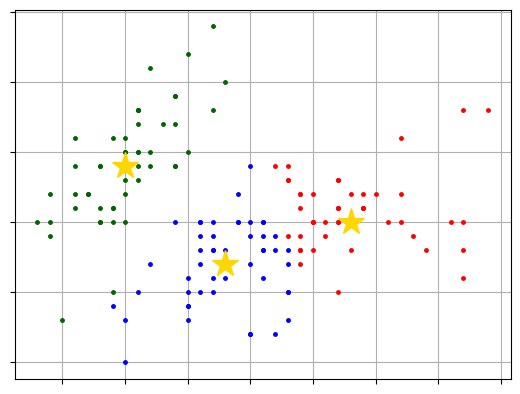

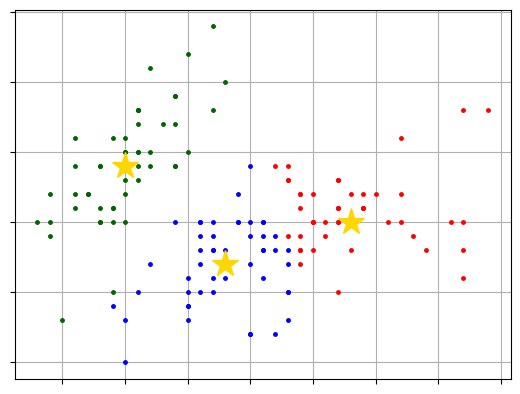

In [26]:
# Visualização do agrupamento (gráfico)


v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:, 0:2])
v.append_cluster(medoids, data = iris.data[:, 0:2], marker = '*', markersize = 20)
v.show()

In [28]:
# Código para criar duas listas.
# Uma com os grupos reais da base de dados e outra com os valores dos grupos
# Utilizado posteriormente para visualização da matriz de contingência

lista_previsoes = []
lista_real = []

for i in range(len(previsoes)):
    for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])


In [33]:
# Geração da matriz de contingência, comparando os grupos reais com os grupos previstos


lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 14,  1]], dtype=int64)

In [1]:
# REGRAS DE ASSOCIAÇÃO p,9 Obs:?

In [9]:
# Instalação da biblioteca apyori

!pip install apyori

In [11]:
# Importação das bibliotecas

import pandas as pd
from apyori import apriori

# Obs: " apriori " 
# algoritmo de mineração de associação que é usado para encontrar regras de associação entre conjuntos de itens.

# Os parâmetros utilizados na operação apriori são os seguintes:
    
#     1. transacoes: Um conjunto de transações, onde cada transação é uma lista de itens.
#     1. min_support: O suporte de uma regra é a porcentagem de transações que contém a regra.
#     1. min_confidence: A confiança de uma regra é a probabilidade de que, se um item estiver presente em uma transação, o outro item também estará presente.
#     1. min_length: O comprimento mínimo para uma regra. O comprimento de uma regra é o número de itens na regra.
    
# A operação apriori retorna um objeto AprioriResults, que contém as regras de associação encontradas pelo algoritmo. 
# Cada regra é representada por um objeto AssociationRule, que contém as seguintes propriedades:

#     1. antecedent: O conjunto de itens antecedente da regra.
#     2. consequent: O conjunto de itens consequente da regra.
#     3. support: O suporte da regra.
#     4. confidence: A confiança da regra.
#     5. lift: O lift da regra.
    
# O lift de uma regra é uma medida de quão forte a associação entre o antecedente e o consequente é. 
# Um lift maior indica uma associação mais forte.

In [13]:
# Leitura das transações


dados = pd.read_csv('transacoes.txt', header = None)
dados

,0,1,2
0,Cerveja,Pizza,Sorvete
1,Pizza,Sorvete,NaN
2,Cerveja,Pizza,NaN
3,Cerveja,Pizza,Sorvete
4,Cerveja,Pizza,NaN
5,Pizza,NaN,NaN


In [14]:
# Transformação para o formato lista (exigido pela biblioteca apryori) 
# 6 é a quantidade de transações na base de dados
# 3 é o nº de itens por transação


transacoes = []
for i in range(0, 6):
    transacoes.append([str(dados.values[i, j]) for j in range(0, 3)])
transacoes

[['Cerveja', 'Pizza', 'Sorvete'],
 ['Pizza', 'Sorvete', 'nan'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Cerveja', 'Pizza', 'Sorvete'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Pizza', 'nan', 'nan']]

In [20]:
# Execução do algoritmo apriori para geração das regras de associação, defininfo os parâmetros de suporte e confiança


regras = apriori(transacoes, min_support = 0.5, min_confidence = 0.5, min_lenght = 2)

In [ ]:
# Criação da nova variável para armazenar somente as regras de associação


resultados = list(regras)
print(resultados[0])
resultados

In [ ]:
# Criação da nova variável, percorrendo a variável anterior para uma melhor visualização dos resultados


resultados2 = [list(x) for x in resultados]
resultados2

In [ ]:
# Criação de outra variável para a visualização das regras ficar mais fácil para o usuário,
# Adicionando as regras encontradas na variável resultados2

    
resultados3 = []
for j in range(0, 7):
    resultados3.append([list(x) for x in resultados2[j][2]])

resultados3

In [ ]:
# Obs: Pulei o " Eclat " para estudar posteriormente

# Dar ao menos uma lida para saber do que se trata